<a href="https://colab.research.google.com/github/santoshrsarangi/tensorflow/blob/main/3_Multi_Input_and_Output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [3]:
input_1 = keras.Input(shape=(32,), name="i1")
input_2 = keras.Input(shape=(16,), name="i2")
input_3 = keras.Input(shape=(10,), name="i3")

my_concatenate_layer = layers.Concatenate(name="c1")([input_1, input_2, input_3])
my_dense_layer = layers.Dense(units=128, activation="relu", name="d1")(my_concatenate_layer)

output_1 = layers.Dense(units=1, activation="sigmoid", name="o1")(my_dense_layer)
output_2 = layers.Dense(units=10, activation = "softmax", name="o2")(my_dense_layer)

In [38]:
type(output_2)

keras.engine.keras_tensor.KerasTensor

In [4]:
model = keras.Model([input_1, input_2, input_3], [output_1, output_2], name="multi-output-model")

In [5]:
model.summary()

Model: "multi-output-model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 i1 (InputLayer)                [(None, 32)]         0           []                               
                                                                                                  
 i2 (InputLayer)                [(None, 16)]         0           []                               
                                                                                                  
 i3 (InputLayer)                [(None, 10)]         0           []                               
                                                                                                  
 c1 (Concatenate)               (None, 58)           0           ['i1[0][0]',                     
                                                                  'i2[0][0]',    

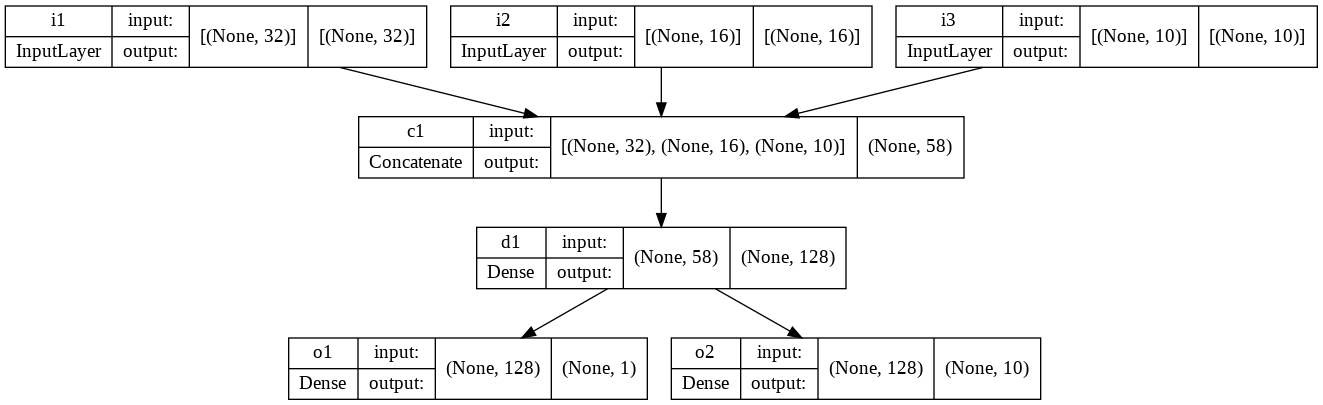

In [6]:
keras.utils.plot_model(model, show_shapes=True)

In [7]:
model.layers

In [8]:
model.layers[3].input

[<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'i1')>,
 <KerasTensor: shape=(None, 16) dtype=float32 (created by layer 'i2')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'i3')>]

In [9]:
model.layers[3].output

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'c1')>

In [10]:
import numpy as np

In [11]:
num_of_records = 5000

In [12]:
test_data_1 = np.random.randint(0, 2, size=(num_of_records, 32))

In [13]:
test_data_1[0]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [14]:
test_data_2 = np.random.randint(0, 2, size = (num_of_records, 16))

In [15]:
test_data_3 = np.random.randint(0, 2, size = (num_of_records, 10))

In [16]:
test_label_1 = np.random.random(size=(num_of_records, 1))

In [17]:
test_label_2 = np.random.randint(0,2, size=(num_of_records, 10))

In [18]:
model.compile(optimizer = "rmsprop",
              loss = ["mean_squared_error","categorical_crossentropy"],
              metrics = [["mean_absolute_error"],["accuracy"]])

In [19]:
model.compile(optimizer="rmsprop",
              loss={"o1": "mean_squared_error", "o2":"categorical_crossentropy"},
              metrics = {"o1": ["mean_absolute_error"], "o2":["accuracy"]})

In [20]:
model.fit({"i1":test_data_1, "i2":test_data_2, "i3":test_data_3},
          {"o1":test_label_1, "o2":test_label_2}, epochs=5)

Epoch 1/5
157/157 [==============================] - 1s 2ms/step - loss: 13.9665 - o1_loss: 0.0971 - o2_loss: 13.8694 - o1_mean_absolute_error: 0.2647 - o2_accuracy: 0.0170
Epoch 2/5
157/157 [==============================] - 0s 3ms/step - loss: 14.4567 - o1_loss: 0.1063 - o2_loss: 14.3504 - o1_mean_absolute_error: 0.2747 - o2_accuracy: 0.0286
Epoch 3/5
157/157 [==============================] - 0s 2ms/step - loss: 14.0930 - o1_loss: 0.1211 - o2_loss: 13.9719 - o1_mean_absolute_error: 0.2886 - o2_accuracy: 0.0628
Epoch 4/5
157/157 [==============================] - 0s 2ms/step - loss: 12.9658 - o1_loss: 0.1370 - o2_loss: 12.8288 - o1_mean_absolute_error: 0.3017 - o2_accuracy: 0.1054
Epoch 5/5
157/157 [==============================] - 0s 2ms/step - loss: 13.0666 - o1_loss: 0.1619 - o2_loss: 12.9047 - o1_mean_absolute_error: 0.3286 - o2_accuracy: 0.1274


In [21]:
model.evaluate([test_data_1, test_data_2, test_data_3],[test_label_1, test_label_2])

157/157 [==============================] - 1s 2ms/step - loss: 16.1334 - o1_loss: 0.2410 - o2_loss: 15.8924 - o1_mean_absolute_error: 0.4065 - o2_accuracy: 0.0060


[16.13338279724121,
 0.24096737802028656,
 15.892414093017578,
 0.40649235248565674,
 0.006000000052154064]

In [22]:
pred_o1, pred_o2 = model.predict([test_data_1, test_data_2, test_data_3])

Now lets see how to add a new output to the existing model

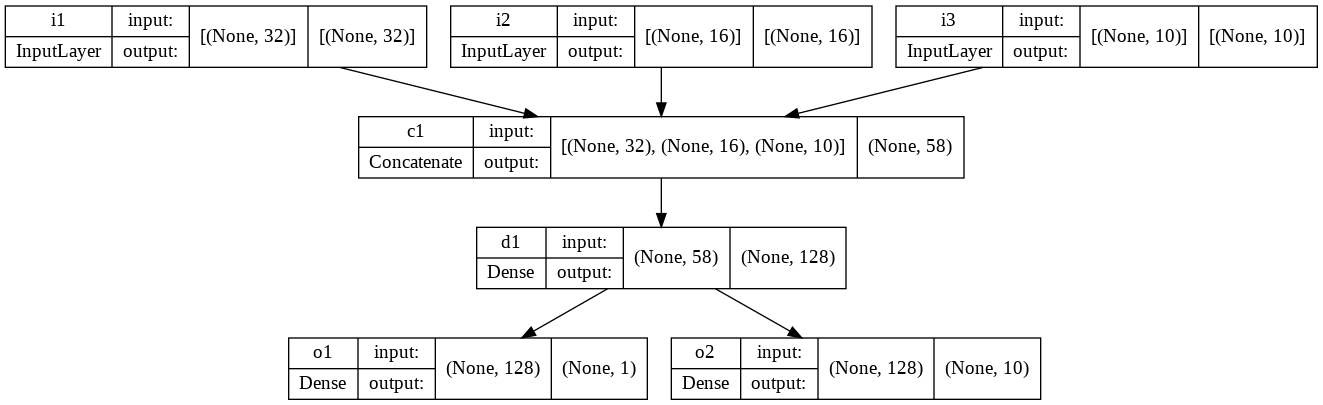

In [25]:
keras.utils.plot_model(model, show_shapes=True)

In [29]:
sample_dense_layer = model.layers[4].output

In [30]:
output_4 = layers.Dense(1, activation="relu")(sample_dense_layer)

In [31]:
type(sample_dense_layer)

keras.engine.keras_tensor.KerasTensor

In [33]:
new_model = keras.Model(
    inputs=[input_1, input_2, input_3],
    outputs = [output_1, output_2, output_4]
)

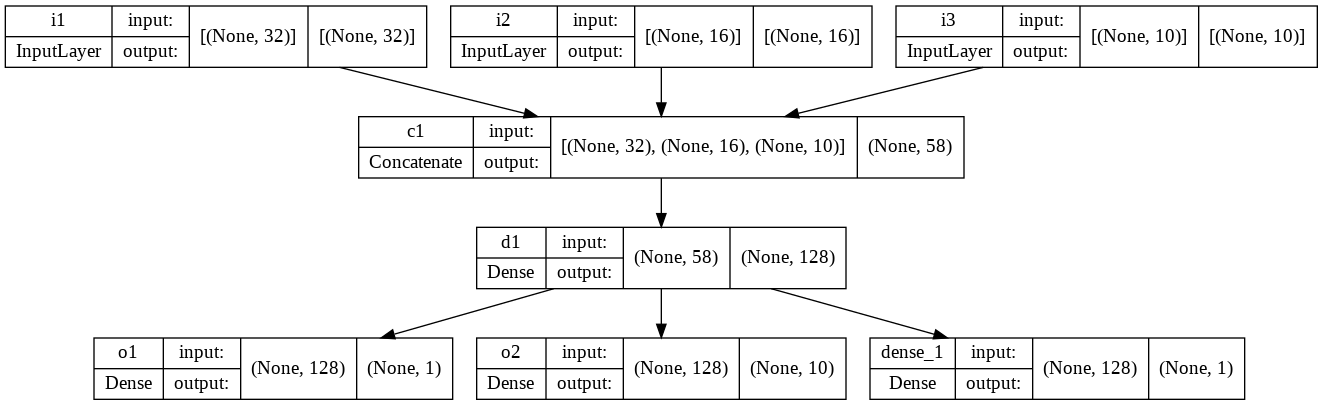

In [34]:
keras.utils.plot_model(new_model, show_shapes=True)